<a href="https://colab.research.google.com/github/ydev365/portfolio-for-internship/blob/main/Nasdaq100_graph_RSI_under_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


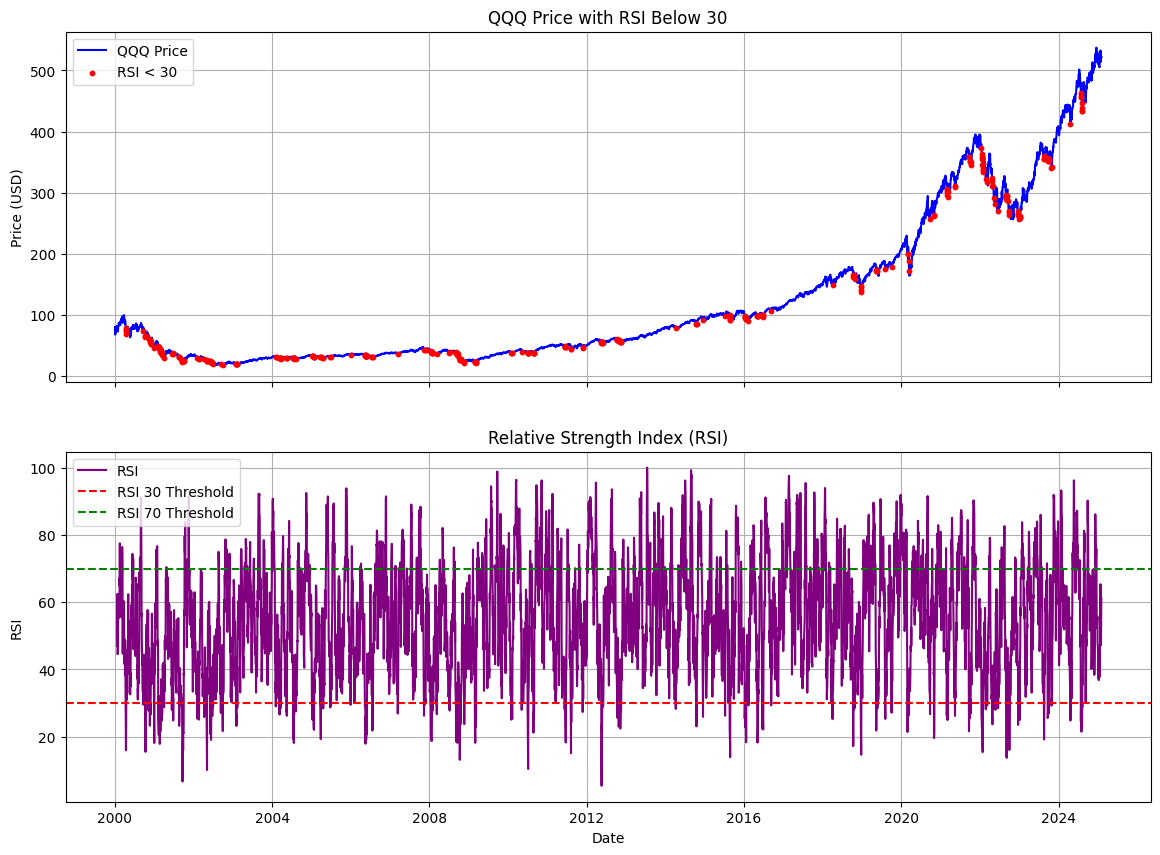

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_rsi(data, column='Close', window=14):
    delta = data[column].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# QQQ (나스닥 100) 데이터 불러오기
qqq = yf.download('QQQ', start='2000-01-01', end=pd.Timestamp.today().strftime('%Y-%m-%d'))
column = 'Adj Close' if 'Adj Close' in qqq.columns else 'Close'
qqq['RSI'] = calculate_rsi(qqq, column=column)

# rsi 30보다 낮은곳 변수에 넣기 RSI < 30
rsi_below_30 = qqq[qqq['RSI'] < 30]

# 플롯 2개 생성
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# QQQ 나스닥 100 그래프에 rsi 30보다 낮은 점 빨간색 점으로 표시
ax[0].plot(qqq.index, qqq[column], label='QQQ Price', color='blue')
ax[0].scatter(rsi_below_30.index, rsi_below_30[column], color='red', label='RSI < 30', s=10, zorder=3)
ax[0].set_title('QQQ Price with RSI Below 30')
ax[0].set_ylabel('Price (USD)')
ax[0].legend()
ax[0].grid()

# RSI 플롯 생성
ax[1].plot(qqq.index, qqq['RSI'], label='RSI', color='purple')
ax[1].axhline(30, color='red', linestyle='dashed', label='RSI 30 Threshold')
ax[1].axhline(70, color='green', linestyle='dashed', label='RSI 70 Threshold')
ax[1].set_title('Relative Strength Index (RSI)')
ax[1].set_ylabel('RSI')
ax[1].set_xlabel('Date')
ax[1].legend()
ax[1].grid()

plt.show()


